In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import platform  # pyplot 한글 깨짐 문제

In [9]:
df = pd.read_csv('./data_055.csv', encoding="cp949")

# 소비 분야 구분
## rough
GROCERY = ['B20', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B29', 'B30', 'B31', 'B32', 'B35', 'B36', 'B37', 'B38', 'B39', 'B40', 'B41', 'B42']
FURNITURE = ['B43', 'B44', 'B45', 'B46', 'B47', 'B48', 'B49', 'B50', 'B52', 'B53', 'B55', 'B56', 'B67', 'B74']
CLOTHES = ['B13', 'B14', 'B15', 'B16', 'B17', 'B18', 'B19', 'B21', 'B63', 'B64', 'B65', 'B56', 'B66', 'B68', 'B69', 'B70', 'B71', 'B72', 'B73']
MEDICAL = ['B106', 'B107', 'B139', 'B140', 'B141', 'B142', 'B143', 'B144', 'B145', 'B146', 'B147', 'B148', 'B149']
FUN = ['B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B79', 'B80', 'B81', 'B82', 'B83', 'B84', 'B85', 'B86', 'B87', 'B88', 'B89', 'B90', 'B91', 'B97', 'B98', 'B99', 'B100', 'B101', 'B102', 'B103', 'B104', 'B105', 'B120', 'B121', 'B123', 'B137', 'B138', 'B152', 'B153', 'B154']
TRAFFIC = ['B7', 'B8', 'B9', 'B10', 'B11', 'B61', 'B62', 'B159', 'B157', 'B158', 'B161', 'B162', 'B164', 'B165', 'B166']
EDUCATION = ['B58', 'B59', 'B60', 'B94', 'B108', 'B122', 'B155', 'B160', 'B156']
TAX = ['B12']
SPEND = ['B28']
ETC = ['B109', 'B110', 'B112', 'B114', 'B115', 'B116', 'B117', 'B129', 'B130', 'B131', 'B132', 'B150', 'B151', 'B163']

df["식료품비"] = df[GROCERY].sum(axis=1)
df["가구/가사용품비"] = df[FURNITURE].sum(axis=1)
df["의류/신발비"] = df[CLOTHES].sum(axis=1)
df["보건의료비"] = df[MEDICAL].sum(axis=1)
df["교양오락비"] = df[FUN].sum(axis=1)
df["교통/통신비"] = df[TRAFFIC].sum(axis=1)
df["교육비"] = df[EDUCATION].sum(axis=1)
df["세금"] = df[TAX].sum(axis=1)
df["자가소비액"] = df[SPEND].sum(axis=1)
df["기타소비지출"] = df[ETC].sum(axis=1)

## specific: 식료품비, 숙박비, 취미
FOOD = ["B35", "B36", "B37", "B38", "B39", "B40", "B41", "B42"]
HOTEL = ["B1", "B2", "B3", "B4", "B5", "B6"]
LEISURE = ["B97", "B98", "B101", "B102", "B103", "B104"]
ONLINE = ["B33", "B34"]
TOTAL = ["B"+str(i) for i in range(1, 167)]

df["외식비"] = df[FOOD].sum(axis=1)
df["숙박비"] = df[HOTEL].sum(axis=1)
df["취미"] = df[LEISURE].sum(axis=1)
df["온라인결제"] = df[ONLINE].sum(axis=1)
df["총가계지출"] = df[TOTAL].sum(axis=1)

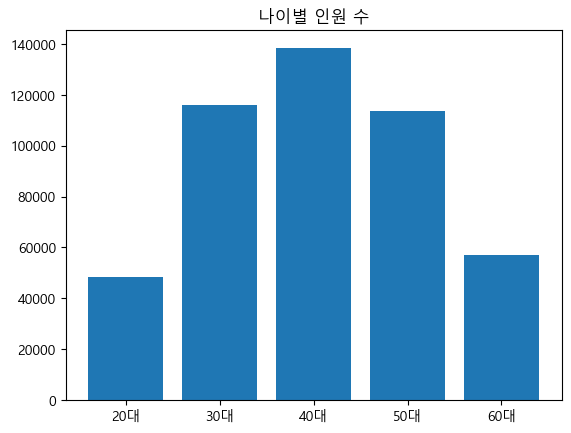

In [30]:
_20_cnt = len(df[(df["P2"] == "20대_초") | (df["P2"] == "20대_후")])
_30_cnt = len(df[(df["P2"] == "30대_초") | (df["P2"] == "30대_후")])
_40_cnt = len(df[(df["P2"] == "40대_초") | (df["P2"] == "40대_후")])
_50_cnt = len(df[(df["P2"] == "50대_초") | (df["P2"] == "50대_후")])
_60_cnt = len(df[(df["P2"] == "60대_초") | (df["P2"] == "60대_후")])


x_axis = ['20대', '30대', '40대', '50대', '60대']
y_axis = [_20_cnt, _30_cnt, _40_cnt, _50_cnt, _60_cnt]

plt.bar(x_axis, y_axis)
plt.title("나이별 인원 수")
plt.show()

In [21]:
def get_y_data(age, x_col, data_size):
    age_df = df[(df["P2"] == str(age) + "대_초") | (df["P2"] == str(age) + "대_후")]
    age_ppl_cnt = len(age_df)
    groups = age_df.groupby(x_col)

    
    y_axis = list(groups[x_col].count() / age_ppl_cnt)
    # dropout, 슬라이싱
    start_index = int(len(y_axis) * 0.1)
    end_index = -1 * start_index
    y_axis = y_axis[start_index : end_index]

    # 전체 데이터의 크기와 맞춤
    if (data_size <= len(y_axis)):
        y_axis = y_axis[0 : data_size]
    else:
        padding_size = data_size - len(y_axis)
        padding_list = [0 for i in range(padding_size)]
        y_axis += padding_list
        
    return y_axis

def draw_line_chart(top_col):
    # df에 대해서 전체 외식비 x축 [1000, 2000, 3000 ,,,, ] 이런식
    chart_keys = list(df[top_col])
    chart_set = list(set(chart_keys))
    chart_sorted = sorted(chart_set)
    # df_start_index = int(len(chart_sorted) * 0.18)
    df_start_index = int(len(chart_sorted) * 0)
    # df_end_index = -1 * df_start_index
    df_end_index = -1 * int(len(chart_sorted) * 0.6)
    
    x_axis = chart_sorted[df_start_index : df_end_index]
    df_size = len(x_axis)

    _20_y_axis = get_y_data(20, top_col, df_size)
    _30_y_axis = get_y_data(30, top_col, df_size)
    _40_y_axis = get_y_data(40, top_col, df_size)
    _50_y_axis = get_y_data(50, top_col, df_size)
    _60_y_axis = get_y_data(60, top_col, df_size)

    plt.figure(figsize=(12, 10))
    plt.rc('font', family='Malgun Gothic')
    plt.plot(x_axis, _20_y_axis, label="20대", color="#FF0000", alpha=0.5)
    plt.plot(x_axis, _30_y_axis, label="30대", color="#FFA500", alpha=0.5)
    plt.plot(x_axis, _40_y_axis, label="40대", color="#0037EC", alpha=0.5)
    plt.plot(x_axis, _50_y_axis, label="50대", color="#00F300", alpha=0.5)
    plt.plot(x_axis, _60_y_axis, label="60대", color="#567714", alpha=0.5)
    plt.title(top_col, fontsize=20)
    plt.xlabel(top_col)
    plt.ylabel("특정 외식비에 해당하는 명수 / 전체 명수")
    plt.legend()
    plt.show()

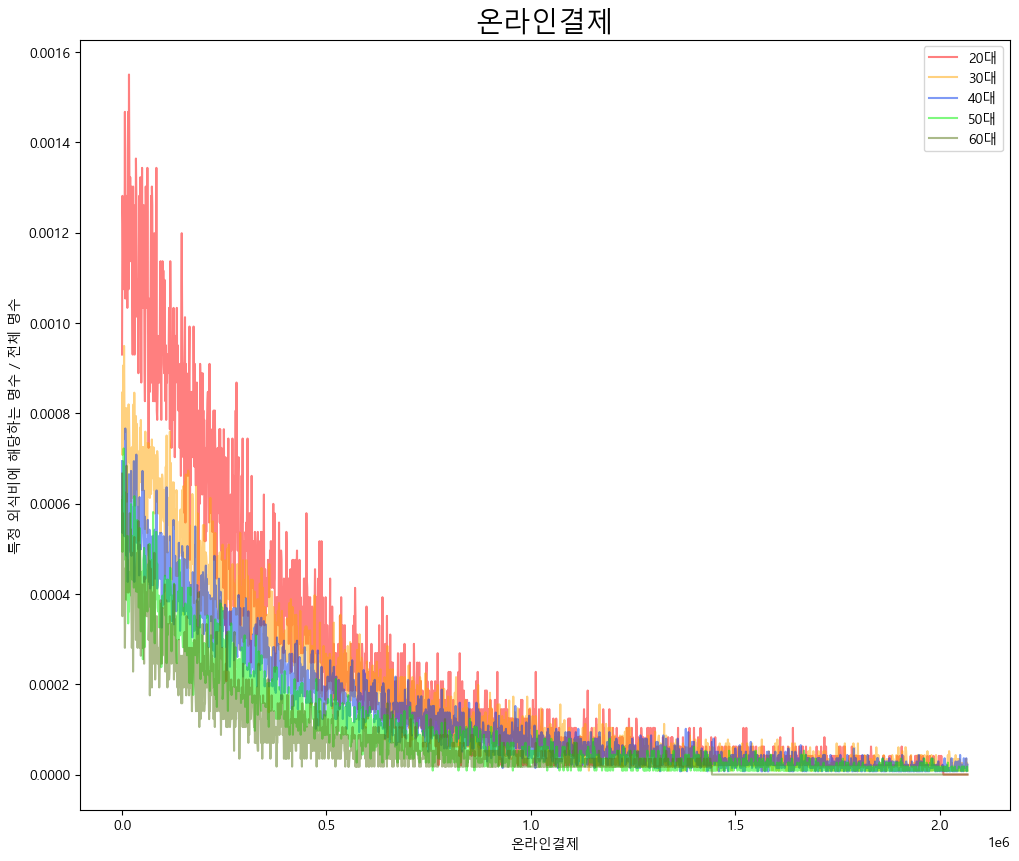

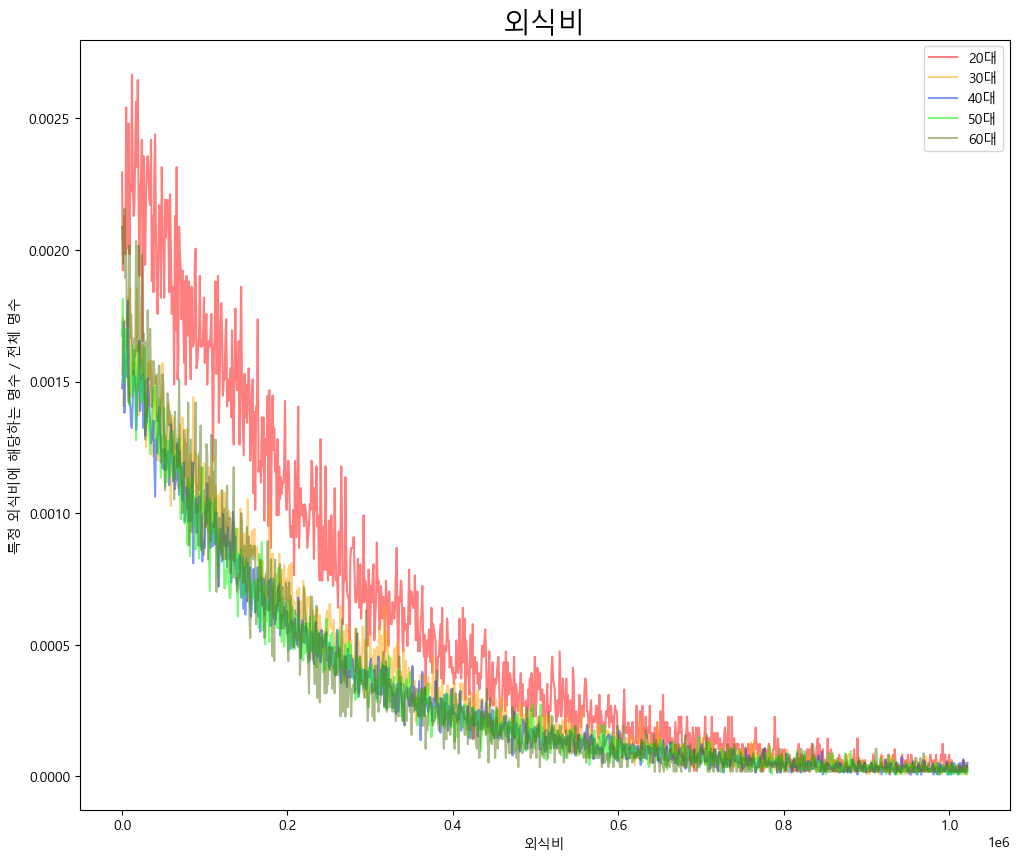

In [22]:
draw_line_chart("온라인결제")
draw_line_chart("외식비")

In [24]:
groups = df.groupby("온라인결제")

groups.mean()

,P3,P4,P5,P6,B1,B2,B3,B4,B5,B6,...,교양오락비,교통/통신비,교육비,세금,자가소비액,기타소비지출,외식비,숙박비,취미,총가계지출
온라인결제,,,,,,,,,,,,,,,,,,,,,
0,0.626036,0.367907,0.065139,0.150725,1813.425488,185.374760,203.475369,1118.032146,3820.206696,176.617872,...,61239.455482,271285.234571,32355.126659,216109.040524,1225.703387,9108.192873,178766.393897,7317.132331,19915.391387,1.315352e+06
1000,0.725632,0.472924,0.137184,0.122744,1209.386282,277.978339,0.000000,1552.346570,2664.259928,34.296029,...,58022.563177,185842.960289,45640.794224,57619.133574,490.974729,12987.364621,212873.646209,5738.267148,18888.086643,1.085952e+06
2000,0.767196,0.465608,0.100529,0.145503,232.804233,0.000000,238.095238,555.555556,3198.412698,2148.148148,...,44973.544974,158280.423280,35211.640212,92915.343915,412.698413,6002.645503,190309.523810,6373.015873,9116.402116,9.661296e+05
3000,0.691166,0.506310,0.084633,0.159614,1396.436526,43.058649,603.563474,2340.014848,3612.472160,305.122494,...,75583.444692,216896.065330,51332.590943,33086.859688,253.897550,14043.801039,201077.951002,8300.668151,24331.848552,1.108464e+06
4000,0.734491,0.471464,0.153846,0.106700,2965.260546,0.000000,0.000000,3086.848635,1679.900744,841.191067,...,62586.848635,177476.426799,27114.143921,21486.352357,1173.697270,6980.148883,207799.007444,8573.200993,20243.176179,9.309218e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32186000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.218600e+07
33139000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,278000.000000,0.000000,0.000000,0.000000,0.000000,6000.000000,0.000000,0.000000,3.368400e+07
33247000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.425200e+07
